In [1]:
# Import the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 
import requests
import time
from datetime import datetime

from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-83.25716918973957 -76.91259478316199
-21.954937170737153 139.43097203322293
64.0749771769168 -106.61371015094426
54.666220441801954 132.947551443132
-10.221611087675711 -121.92494849871112
-23.110636432581956 172.00227819329746
46.168287156717355 167.33397480547274
43.85086317075002 25.415647440645813
-20.496822639790707 -162.7261574016058
28.278482074863007 -88.6170416468863
82.88929030021541 134.10737937150083
27.25194264305007 -179.17609510789
3.87433203353649 -25.370928220496637
1.7417421455796216 128.97573038659482
-23.706782657305908 -128.67525566467532
45.33559670867987 -96.25085450993478
20.01802013038271 -46.30875992477095
-58.89472073077122 4.0867930030676405
88.19002801519571 32.89105837688504
-8.494438124859997 -138.5836961542084
-71.93307830399226 44.789120570417
-50.5785895850113 -90.7569106348898
37.44691982633381 -83.54029108587673
48.92164929572013 72.53300820864249
-43.83883966073033 -110.70048188327996
-22.087906961536206 68.58715398577135
31.906581843977207 116.760

-67.57136658292336 -52.316250794401014
5.230775508038391 29.04578602876606
45.9646984509335 8.492080023912337
-88.99118262949735 -56.42903366943358
35.87078953897705 163.71142233376946
-35.31497942876666 -160.35543001490984
-39.19732558015609 107.84352672893402
-83.36052551946587 134.8283498636153
-54.03325452526759 -3.6626314392977406
-21.36386283560998 -57.85519417033697
-15.10739854457401 -15.035370610210407
37.31384445216473 68.3968145701815
17.59867106646709 -159.17514017221737
64.55970253532794 -48.092458541529254
7.684887337206945 -118.87399633407215
53.2996790072695 -11.743331595045618
-54.31749721763957 -135.706034727533
50.21548883777598 -92.50148569949754
73.98883764469437 175.55520135872916
22.04993860576222 176.46396038493685
33.46232842331382 -29.187382790365177
-28.877712505192278 -145.0078645527791
66.72198762868305 -175.17876412631063
-89.88377793988964 162.57625044923685
74.33447071829696 139.73190597002588
-77.2532577015065 68.90263993455659
-77.89796089316808 -145.1

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | mount isa
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | tokur
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | tadine
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | smardioasa
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | pascagoula
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | sao filipe
Processing Record 14 of Set 1 | ternate
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | fergus falls
Processing Record 17 of Set 1 | bathsheba
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | berlevag
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | berea
Processing Recor

Processing Record 40 of Set 4 | isangel
Processing Record 41 of Set 4 | adrar
Processing Record 42 of Set 4 | wahiawa
Processing Record 43 of Set 4 | okhotsk
Processing Record 44 of Set 4 | lasa
Processing Record 45 of Set 4 | samusu
City not found. Skipping...
Processing Record 46 of Set 4 | sahuaripa
Processing Record 47 of Set 4 | muros
Processing Record 48 of Set 4 | falun
Processing Record 49 of Set 4 | atambua
Processing Record 50 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 1 of Set 5 | pimentel
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | ust-tsilma
Processing Record 4 of Set 5 | kenai
Processing Record 5 of Set 5 | toliary
City not found. Skipping...
Processing Record 6 of Set 5 | storslett
Processing Record 7 of Set 5 | port elizabeth
Processing Record 8 of Set 5 | mikumi
Processing Record 9 of Set 5 | azimur
City not found. Skipping...
Processing Record 10 of Set 5 | hudson bay
Processing Record 11 of Set 5 | haibowan
City not foun

City not found. Skipping...
Processing Record 31 of Set 8 | cidreira
Processing Record 32 of Set 8 | wodonga
Processing Record 33 of Set 8 | longyearbyen
Processing Record 34 of Set 8 | shamary
Processing Record 35 of Set 8 | westerkappeln
Processing Record 36 of Set 8 | northam
Processing Record 37 of Set 8 | beyneu
Processing Record 38 of Set 8 | nganjuk
Processing Record 39 of Set 8 | richards bay
Processing Record 40 of Set 8 | cehegin
Processing Record 41 of Set 8 | lodja
Processing Record 42 of Set 8 | bokspits
City not found. Skipping...
Processing Record 43 of Set 8 | tiksi
Processing Record 44 of Set 8 | fukue
Processing Record 45 of Set 8 | rio grande
Processing Record 46 of Set 8 | atherton
Processing Record 47 of Set 8 | loveland
Processing Record 48 of Set 8 | tashara
Processing Record 49 of Set 8 | sidi qasim
City not found. Skipping...
Processing Record 50 of Set 8 | alofi
Processing Record 1 of Set 9 | ilulissat
Processing Record 2 of Set 9 | haines junction
Processing 

Processing Record 19 of Set 12 | garcia
Processing Record 20 of Set 12 | udachnyy
Processing Record 21 of Set 12 | kopyevo
City not found. Skipping...
Processing Record 22 of Set 12 | antofagasta
Processing Record 23 of Set 12 | hiranagar
Processing Record 24 of Set 12 | oranjemund
Processing Record 25 of Set 12 | poum
Processing Record 26 of Set 12 | formosa do rio preto
Processing Record 27 of Set 12 | parintins
Processing Record 28 of Set 12 | ust-shonosha
Processing Record 29 of Set 12 | yerbogachen
Processing Record 30 of Set 12 | tungkang
City not found. Skipping...
Processing Record 31 of Set 12 | mushabani
Processing Record 32 of Set 12 | sobolevo
Processing Record 33 of Set 12 | lafiagi
Processing Record 34 of Set 12 | mitzic
Processing Record 35 of Set 12 | maridi
Processing Record 36 of Set 12 | omegna
Processing Record 37 of Set 12 | fuerte olimpo
Processing Record 38 of Set 12 | chorbog
City not found. Skipping...
Processing Record 39 of Set 12 | ewa beach
Processing Recor

In [7]:
len(city_data)

569

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,40.66,93,100,9.22,AR,2022-06-08 17:47:50
1,Mount Isa,-20.7333,139.5000,40.77,70,63,0.00,AU,2022-06-08 17:47:50
2,Yellowknife,62.4560,-114.3525,66.72,39,20,13.80,CA,2022-06-08 17:47:50
3,Tokur,53.1333,132.9000,39.58,98,73,5.12,RU,2022-06-08 17:47:51
4,Atuona,-9.8000,-139.0333,78.44,72,19,18.28,PF,2022-06-08 17:47:51
5,Tadine,-21.5500,167.8833,76.10,78,98,11.68,NC,2022-06-08 17:47:51
6,Nikolskoye,59.7035,30.7861,62.49,97,100,4.83,RU,2022-06-08 17:47:52
7,Smardioasa,43.8500,25.4333,66.74,68,38,7.45,RO,2022-06-08 17:47:52
8,Avarua,-21.2078,-159.7750,66.25,100,16,1.14,CK,2022-06-08 17:47:52
9,Pascagoula,30.3658,-88.5561,92.41,61,20,5.75,US,2022-06-08 17:47:53


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-06-08 17:47:50,-54.8000,-68.3000,40.66,93,100,9.22
1,Mount Isa,AU,2022-06-08 17:47:50,-20.7333,139.5000,40.77,70,63,0.00
2,Yellowknife,CA,2022-06-08 17:47:50,62.4560,-114.3525,66.72,39,20,13.80
3,Tokur,RU,2022-06-08 17:47:51,53.1333,132.9000,39.58,98,73,5.12
4,Atuona,PF,2022-06-08 17:47:51,-9.8000,-139.0333,78.44,72,19,18.28
5,Tadine,NC,2022-06-08 17:47:51,-21.5500,167.8833,76.10,78,98,11.68
6,Nikolskoye,RU,2022-06-08 17:47:52,59.7035,30.7861,62.49,97,100,4.83
7,Smardioasa,RO,2022-06-08 17:47:52,43.8500,25.4333,66.74,68,38,7.45
8,Avarua,CK,2022-06-08 17:47:52,-21.2078,-159.7750,66.25,100,16,1.14
9,Pascagoula,US,2022-06-08 17:47:53,30.3658,-88.5561,92.41,61,20,5.75


In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

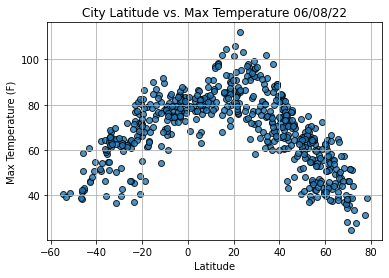

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

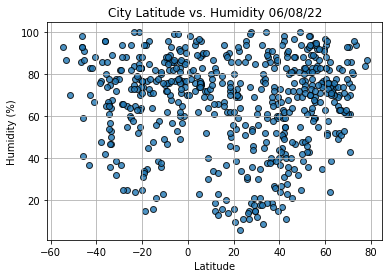

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

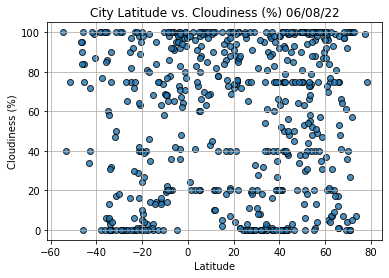

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

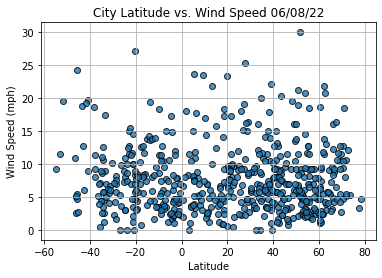

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()